<a href="https://colab.research.google.com/github/GuerrillaGambit/Neural-Cryptography/blob/master/Data%20Proprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
import cv2
import pydot
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Dense, Concatenate, Conv2D, Flatten, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D, GlobalMaxPooling2D, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[19]')

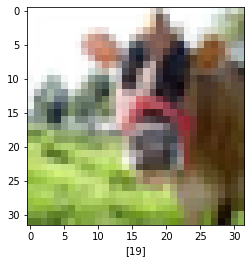

In [4]:
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

In [5]:
# for i in range(0,50000):
#     X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2HSV)
#     #y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2HSV)

# for j in range(0,10000):
#     X_test[j] = cv2.cvtColor(X_test[j], cv2.COLOR_BGR2HSV)
#     #y_test[j] = cv2.cvtColor(y_test[j], cv2.COLOR_BGR2HSV)

In [6]:
x_train = np.zeros(X_train.shape)

In [7]:
x_train[...,0] = X_train[...,0]/255
x_train[...,1] = X_train[...,1]/255
x_train[...,2] = X_train[...,2]/255

In [8]:
def tot_encoder():
    encoder_input = Input(shape=(32, 32, 3))
    x = Reshape((32, 32, 1))(encoder_input[..., 0])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(30, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder1_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 1])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(30, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder2_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 2])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(30, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder3_output = Dense(100, activation="relu")(x)

    junc = Concatenate()([encoder1_output, encoder2_output, encoder3_output])
    return Model(encoder_input, Flatten()(junc), name="tot_encoder")

Model: "tot_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

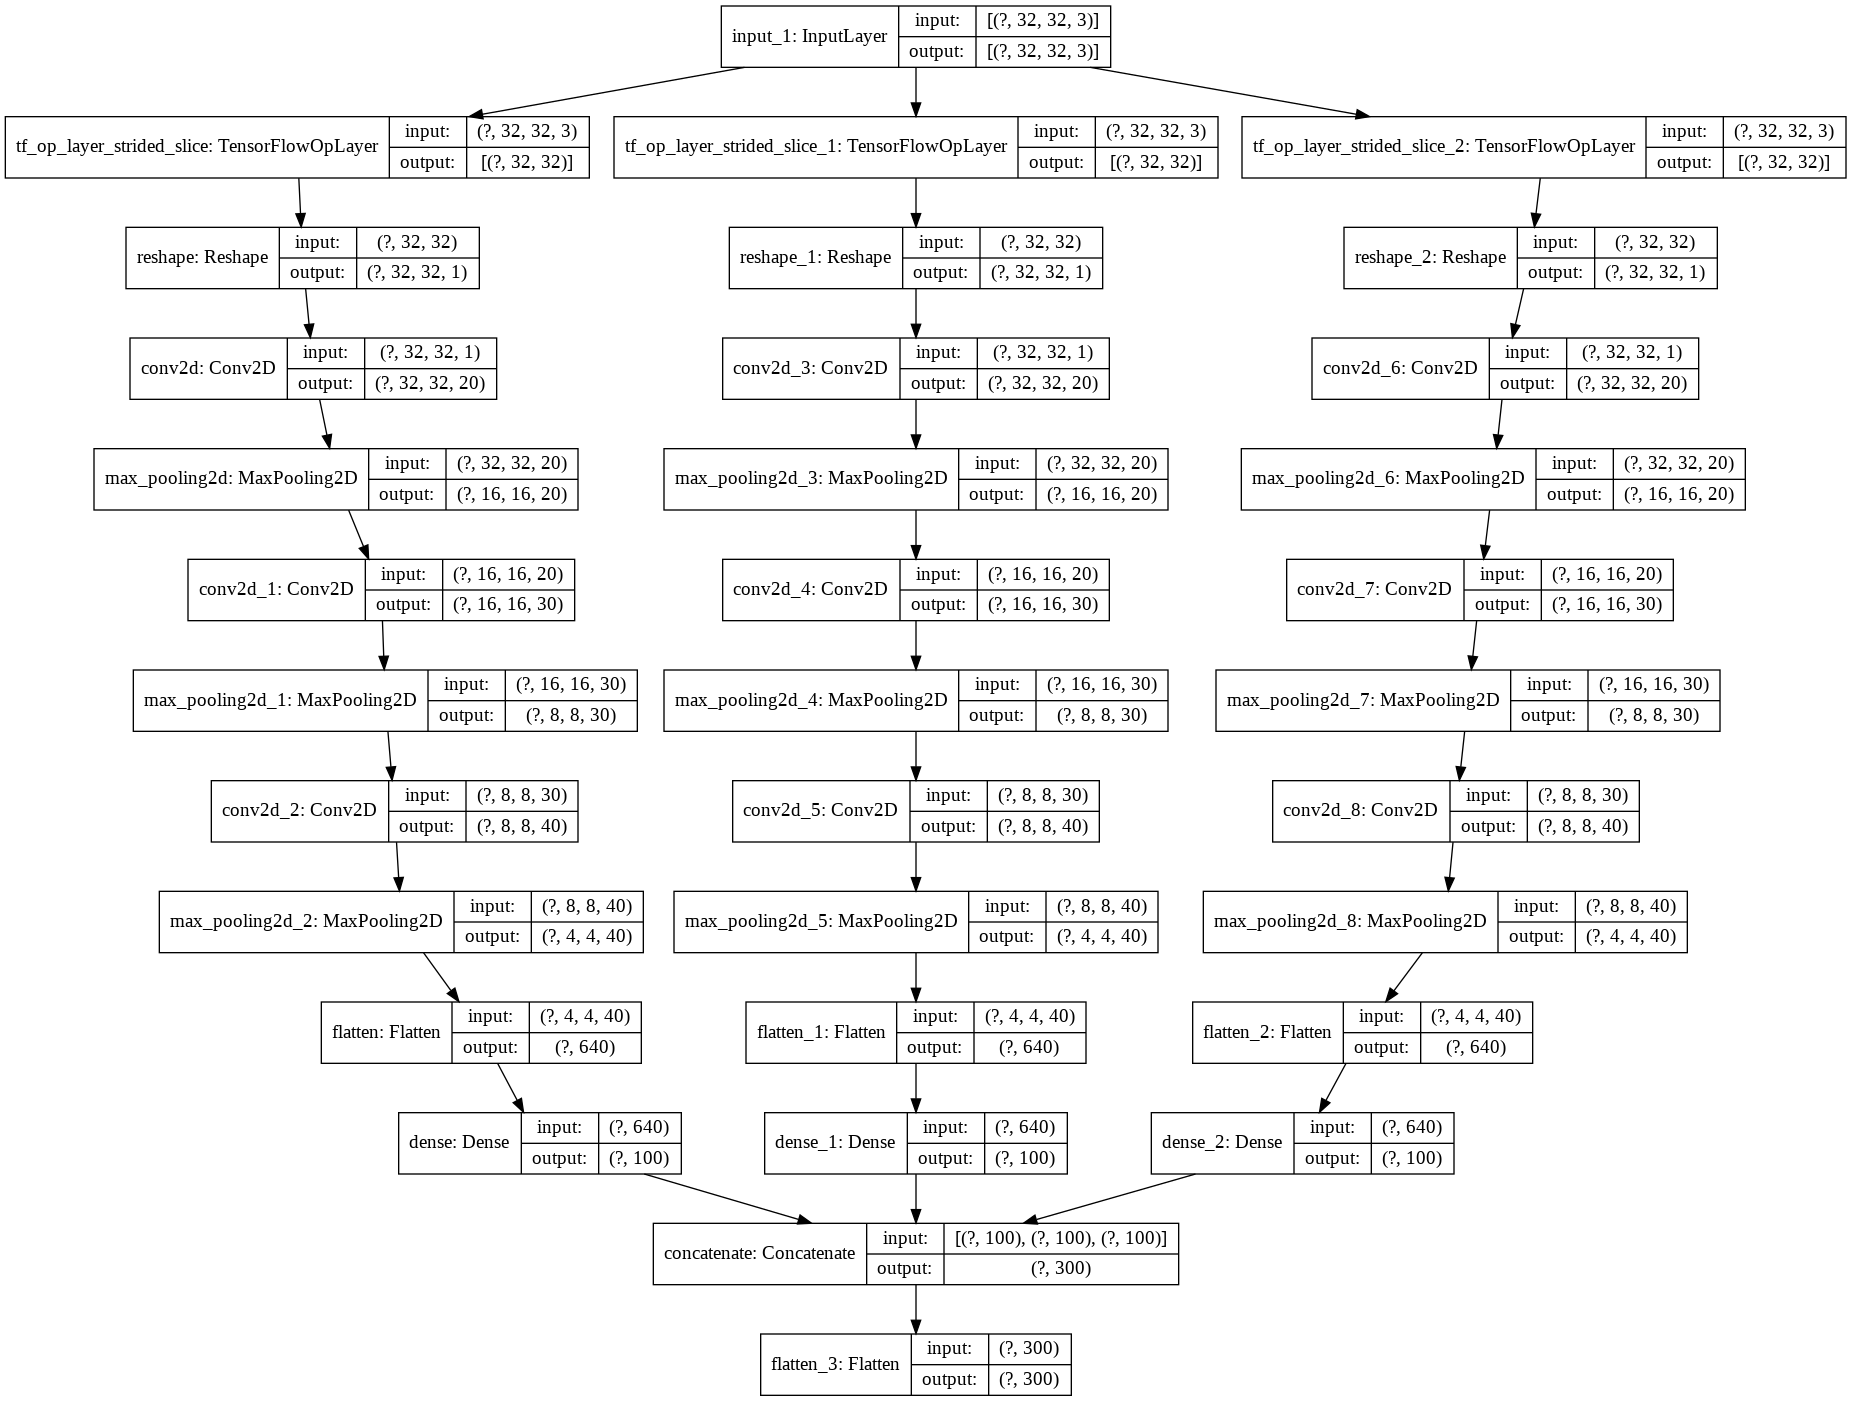

In [9]:
tot_encoder = tot_encoder()
tot_encoder.summary()
plot_model(tot_encoder,to_file="tot_encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [10]:
def decoder():
  decoder_input1 = Input(shape=(3*100,))
  x = Dense(8*8*32)(decoder_input1)
  x = Reshape((8, 8, 32))(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(40, (3,3), activation="relu", padding="same")(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(20, (3,3), activation="relu", padding="same")(x)
  decoder_output = Conv2DTranspose(3, 3, activation="sigmoid", padding='same')(x)
  return Model(decoder_input1, decoder_output, name="decoder")

In [11]:
# encoder1 = encoder1()
# encoder1.summary()

In [12]:
# encoder2 = encoder2()
# encoder2.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              616448    
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 40)        11560     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 20)        7220

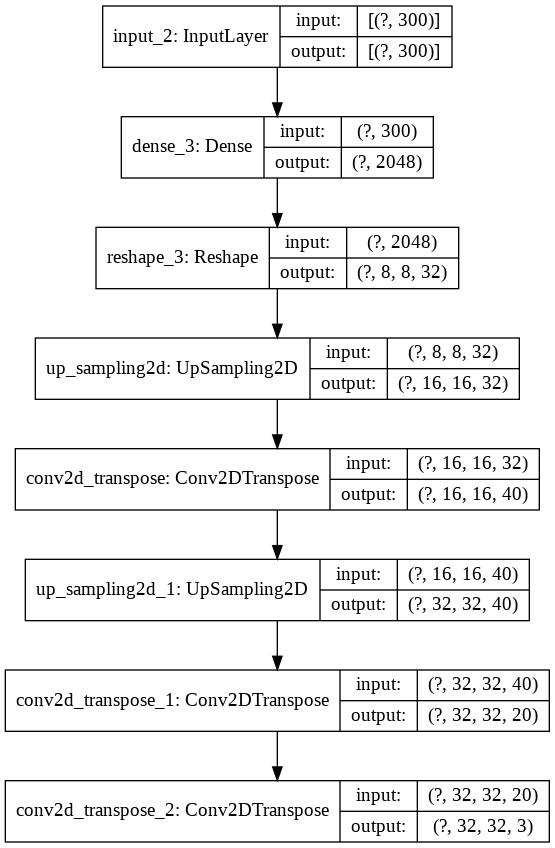

In [13]:
decoder = decoder()
decoder.summary()
plot_model(decoder,to_file="decoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [14]:
# junction = junction()
# encoder = Model([encoder1.input, encoder2.input], junction([encoder1.output, encoder2.output]))
# encoder.summary()
# plot_model(encoder,to_file="encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

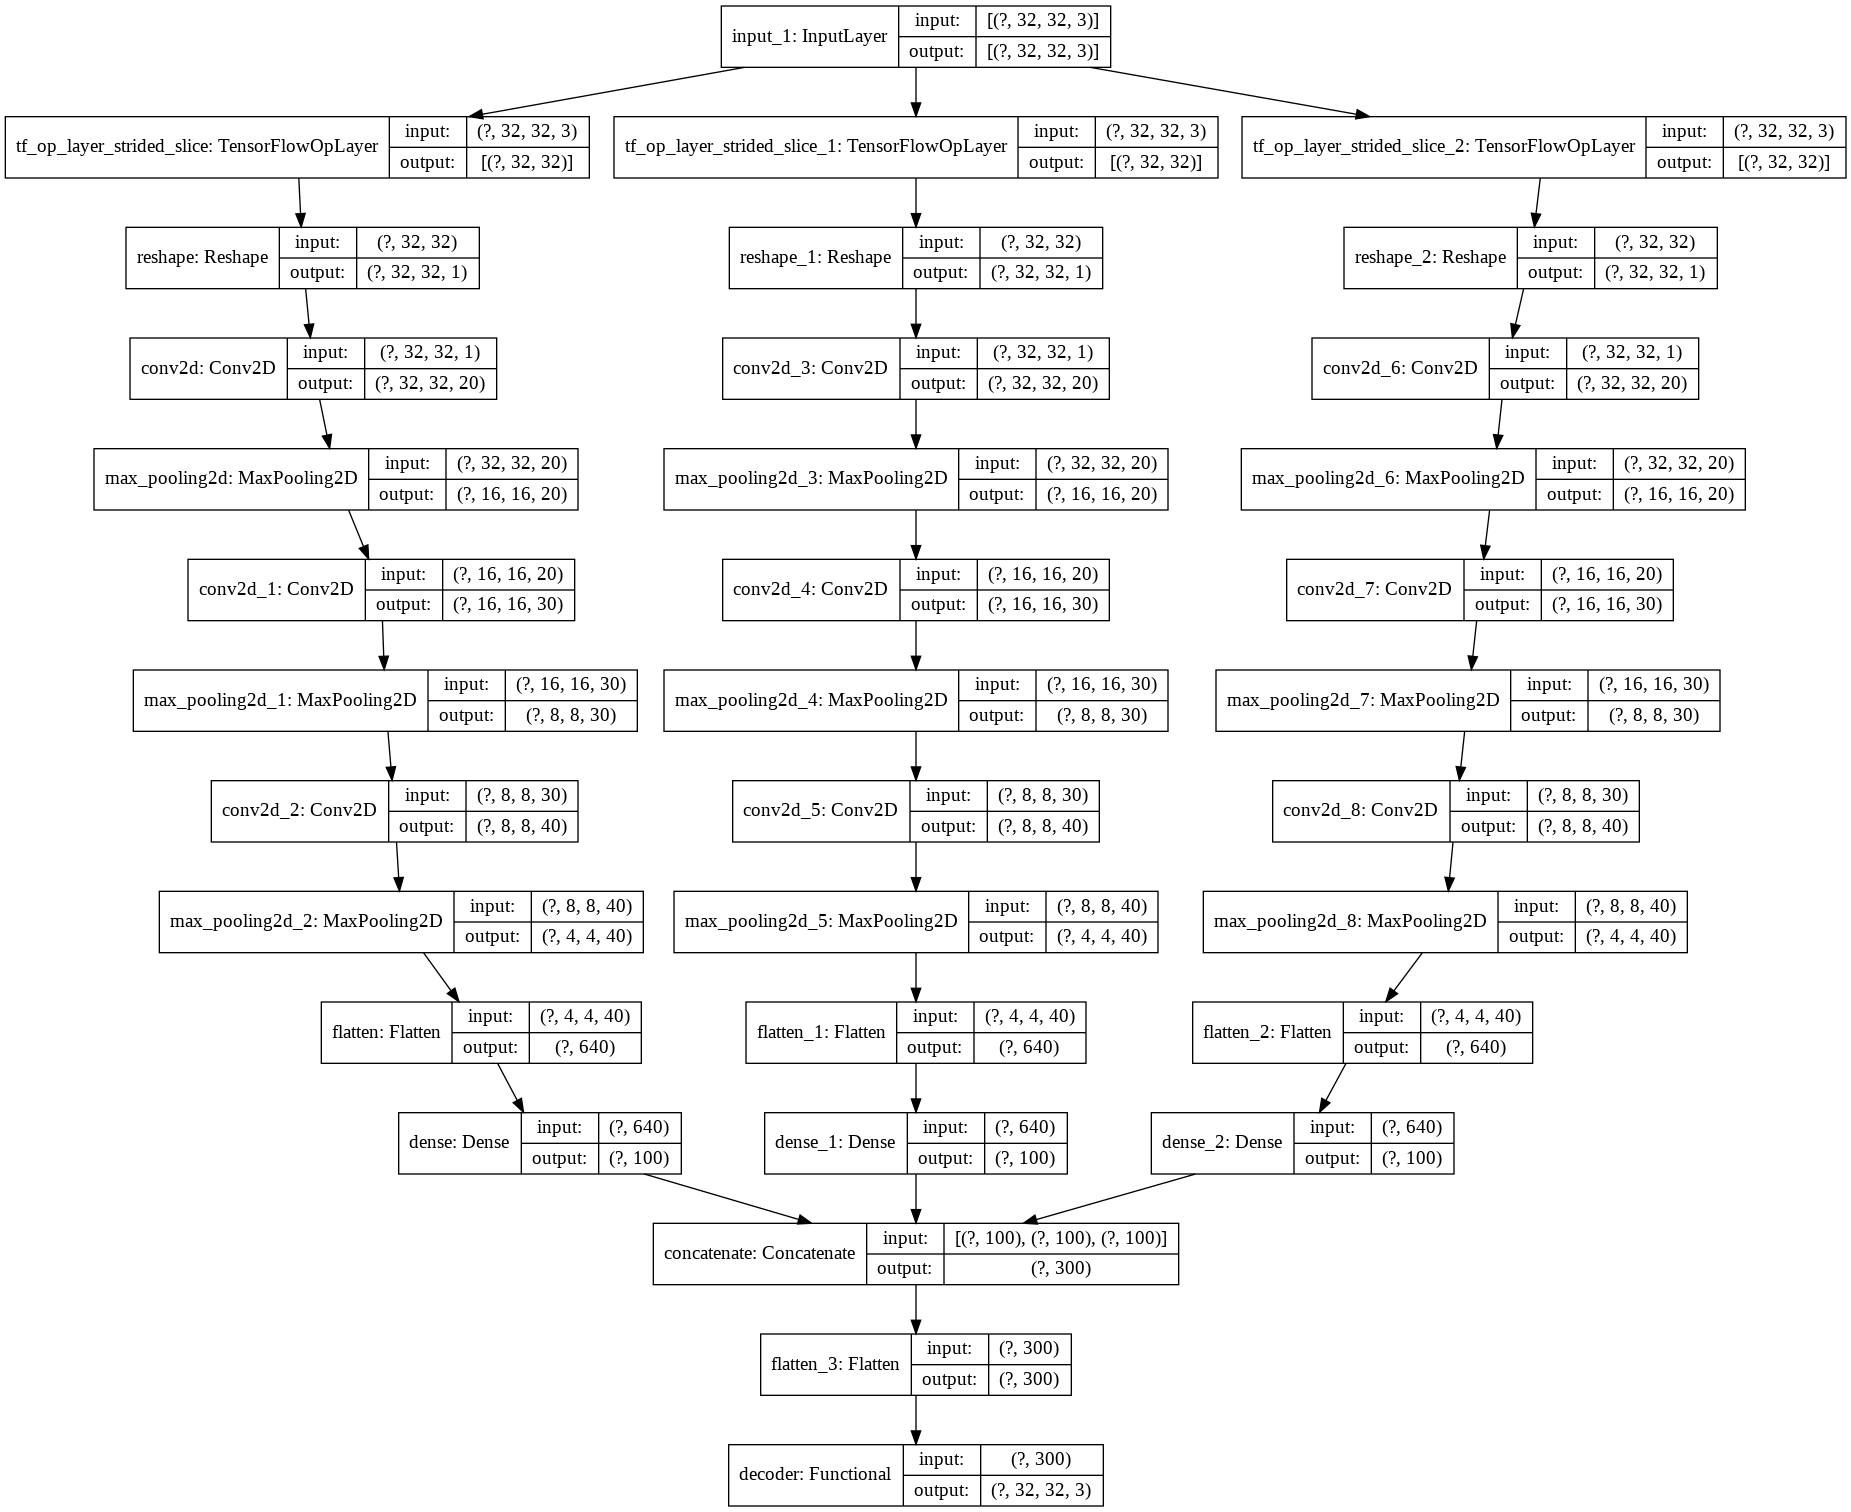

In [15]:
autoencoder = Model(tot_encoder.input, decoder(tot_encoder.output), name="autoencoder")
autoencoder.summary()
plot_model(autoencoder,to_file="autoencoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [16]:
# autoencoder.compile(loss = 'mae', optimizer = "Adam", metrics=["accuracy"])

In [17]:
opt = tf.optimizers.Adam(learning_rate=0.0005)
autoencoder.compile(loss = 'mae', optimizer = opt, metrics=["accuracy"]) 

In [18]:
# autoencoder.fit(X_train, X_train, epochs = 1, batch_size = 32)
history = autoencoder.fit(x_train, x_train, epochs = 25, batch_size = 16)

Epoch 1/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0846 - accuracy: 0.6932
Epoch 2/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0654 - accuracy: 0.7470
Epoch 3/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0602 - accuracy: 0.7579
Epoch 4/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0569 - accuracy: 0.7657
Epoch 5/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0545 - accuracy: 0.7714
Epoch 6/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0526 - accuracy: 0.7765
Epoch 7/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0511 - accuracy: 0.7798
Epoch 8/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.0500 - accuracy: 0.7835
Epoch 9/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0490 - accuracy: 0.7854
Epoch 10/25
3125/3125 [==============================] - 14s 5ms/step - l

In [19]:
def ncoder():
  ncoder_input = Input(shape=(32, 32, 3))
  x = Conv2D(20, (3,3), activation="relu", padding='same')(ncoder_input)
  x = MaxPooling2D()(x)
  x = Conv2D(30, (3,3), activation="relu", padding='same')(x)
  x = MaxPooling2D()(x)
  x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
  x = MaxPooling2D()(x)
  x = Flatten()(x)
  ncoder_output = Dense(300, activation="relu")(x)
  return Model(ncoder_input,ncoder_output, name="ncoder")

Model: "ncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 30)        5430      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 30)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 40)          10840     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 40)          0    

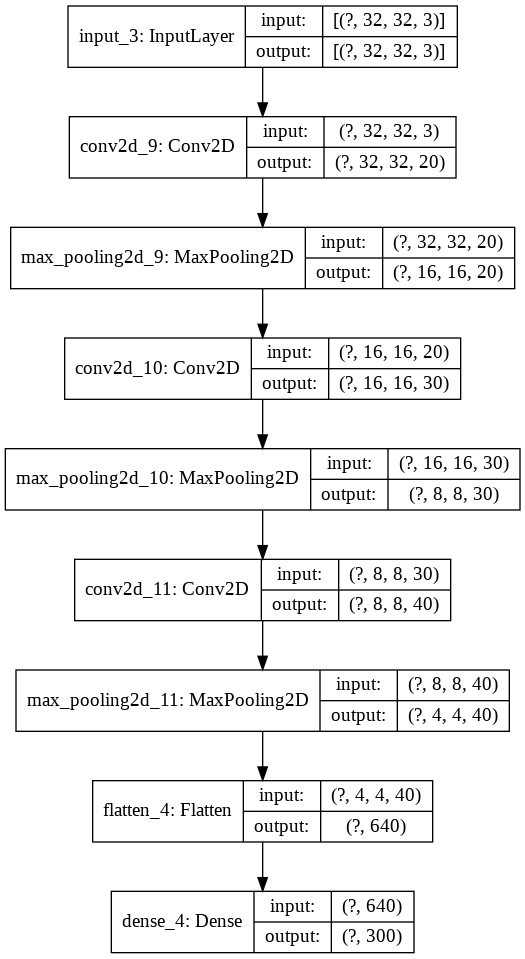

In [20]:
ncoder = ncoder()
ncoder.summary()
plot_model(ncoder,to_file="ncoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [21]:
def dcoder():
  dcoder_input = Input(shape=(3*100,))
  x = Dense(8*8*32)(dcoder_input)
  x = Reshape((8, 8, 32))(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(40, (3,3), activation="relu", padding="same")(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(20, (3,3), activation="relu", padding="same")(x)
  dcoder_output = Conv2DTranspose(3, 3, activation="sigmoid", padding='same')(x)
  return Model(dcoder_input, dcoder_output, name="dcoder")

Model: "dcoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              616448    
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 40)        11560     
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 20)        7220 

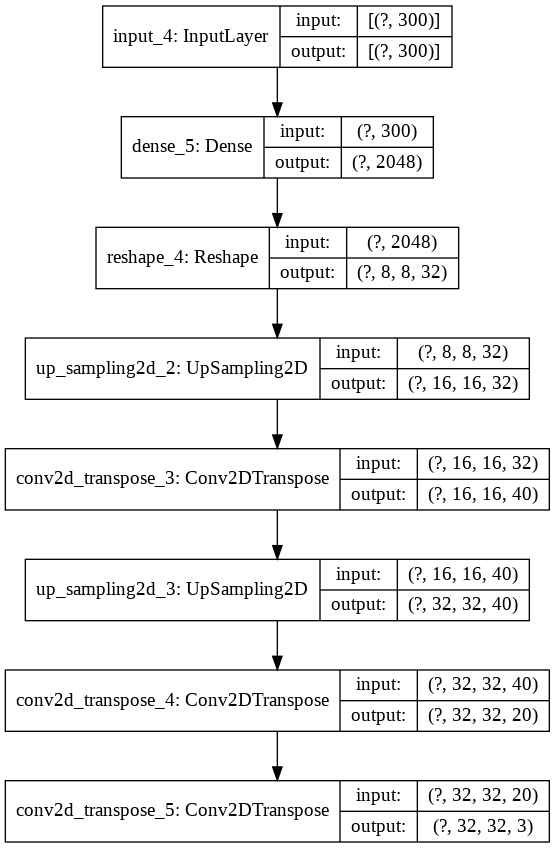

In [22]:
dcoder = dcoder()
dcoder.summary()
plot_model(dcoder,to_file="dcoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "autoncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 30)        5430      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 30)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 40)          10840     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 40)          0

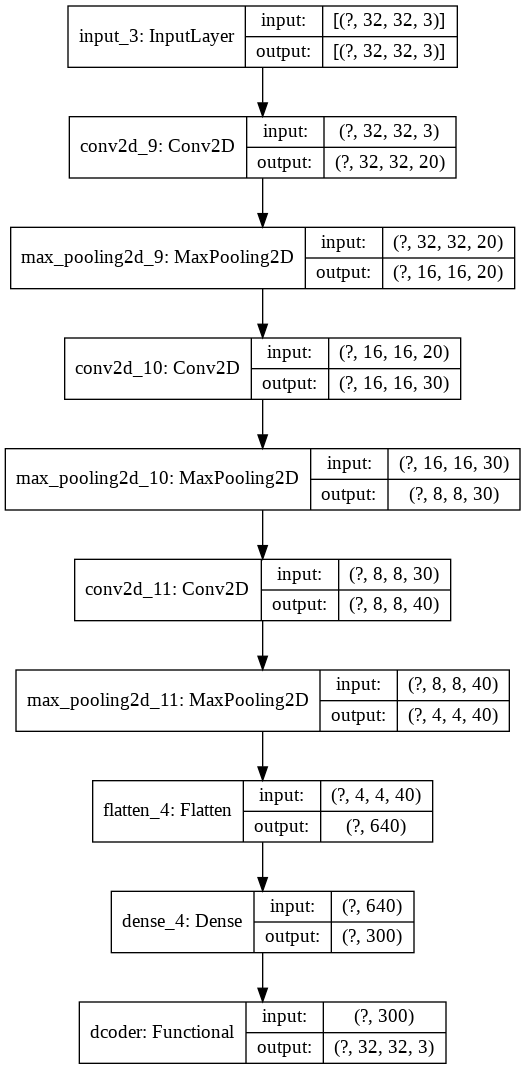

In [23]:
autoncoder = Model(ncoder.input, dcoder(ncoder.output), name="autoncoder")
autoncoder.summary()
plot_model(autoncoder,to_file="autoncoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [24]:
opt1 = tf.optimizers.Adam(learning_rate=0.0005)
autoncoder.compile(loss = 'mae', optimizer = opt1, metrics=["accuracy"]) 

In [25]:
histry = autoncoder.fit(x_train, x_train, epochs = 25, batch_size = 16)

Epoch 1/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0894 - accuracy: 0.6615
Epoch 2/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0697 - accuracy: 0.7396
Epoch 3/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0644 - accuracy: 0.7516
Epoch 4/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0614 - accuracy: 0.7620
Epoch 5/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0593 - accuracy: 0.7682
Epoch 6/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0576 - accuracy: 0.7718
Epoch 7/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0563 - accuracy: 0.7745
Epoch 8/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.0552 - accuracy: 0.7772
Epoch 9/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0543 - accuracy: 0.7789
Epoch 10/25
3125/3125 [==============================] - 10s 3ms/step - l

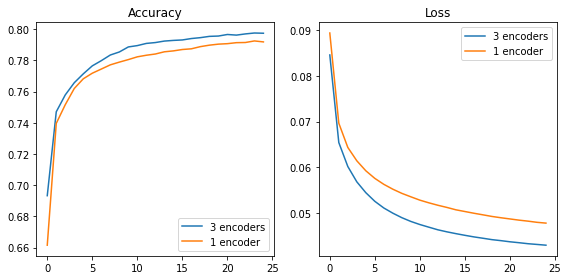

In [26]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'], label="3 encoders")
ax1.plot(histry.history['accuracy'], label="1 encoder")
ax1.legend()
ax1.set_title("Accuracy")
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'], label="3 encoders")
ax2.plot(histry.history['loss'], label="1 encoder")
ax2.legend()
ax2.set_title("Loss")
plt.tight_layout()
# plt.savefig("resources/relu.png", dpi=300)
plt.show()

In [27]:
image1 =  autoncoder.predict(x_train[50].reshape(1,32,32,3))
image1 = image1.reshape(32,32,3)

In [28]:
image =  autoencoder.predict(x_train[50].reshape(1,32,32,3))
image = image.reshape(32,32,3)

<Figure size 432x288 with 0 Axes>

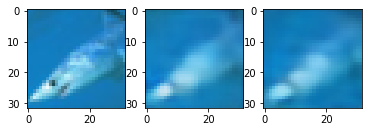

In [29]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(x_train[50], label = 'image')
axarr[1].imshow(image, label = '3 encoders')
# axarr[2].imshow(x_train[5])
axarr[2].imshow(image1, label = '1 encoder')

In [30]:
# encoder = encoder()
# encoder.summary()
# plot_model(encoder,to_file="encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")